## Cleaning Numerical Data

In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Renaming the columns
def rename_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")
    return df

In [6]:
rename_columns(customer_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
# Change effective to date column to datetime format
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].info

<bound method Series.info of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

In [8]:
#Check missing values in data frame
customer_df.isnull().sum()
#No null values! 

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
#Define a function to return two dataframes with numerical and categorical separated
def df_split(df):
    numericals = df.select_dtypes(np.number)
    categoricals = df.select_dtypes('object')
    return numericals, categoricals


In [10]:
numericals, categoricals = df_split(customer_df)

In [11]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
# Drop ID columns 
categoricals= categoricals.drop(['customer'], axis = 1)

In [14]:
#Get correlation matrix for the numerical variables. 
numerical_corr = numericals.corr()
numerical_corr 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


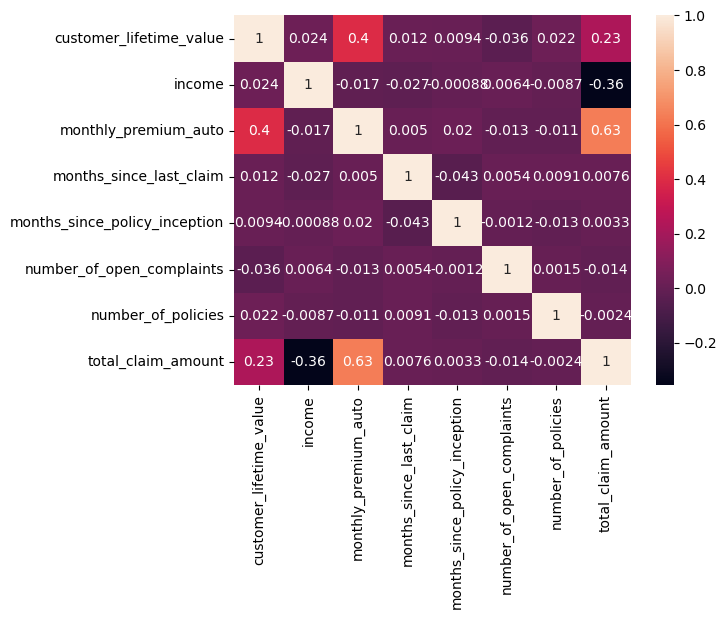

In [15]:
sns.heatmap(numerical_corr, annot=True)
plt.show()

In [16]:
#Highest correlation between monthly premium auto and total claim amount. 
#This makes sense if monthly premium is higher, you can claim more insurance. 

In [17]:
len(numericals['number_of_policies'].value_counts())
len(numericals['income'].value_counts())
#If number of unique values > 36 then continous 

5694

In [18]:
def numerical_split(df, c=36):
    continuous = []
    discrete = []
    for col in df:
        if len(df[col].value_counts())> c:#continuous dataframe with those columns
            continuous.append(df[col])
        else: #discrete dataframe with remaining columns
            discrete.append(df[col])
    continuous_df = pd.DataFrame(continuous).T #needs to be transposed
    discrete_df = pd.DataFrame(discrete).T
    return continuous_df, discrete_df  

In [19]:
continuous_df, discrete_df = numerical_split(numericals)

In [20]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879


In [21]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [22]:
# Create a function to create a barplots for all the columns of the discrete_df. 

In [23]:
def discrete_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for i in df.columns:
        d = pd.DataFrame(df[i].value_counts()).reset_index()
        sns.barplot(data= df, x=d.iloc[:,0], y=d.iloc[:,1], ci=None)
        plt.tight_layout()
        plt.show()

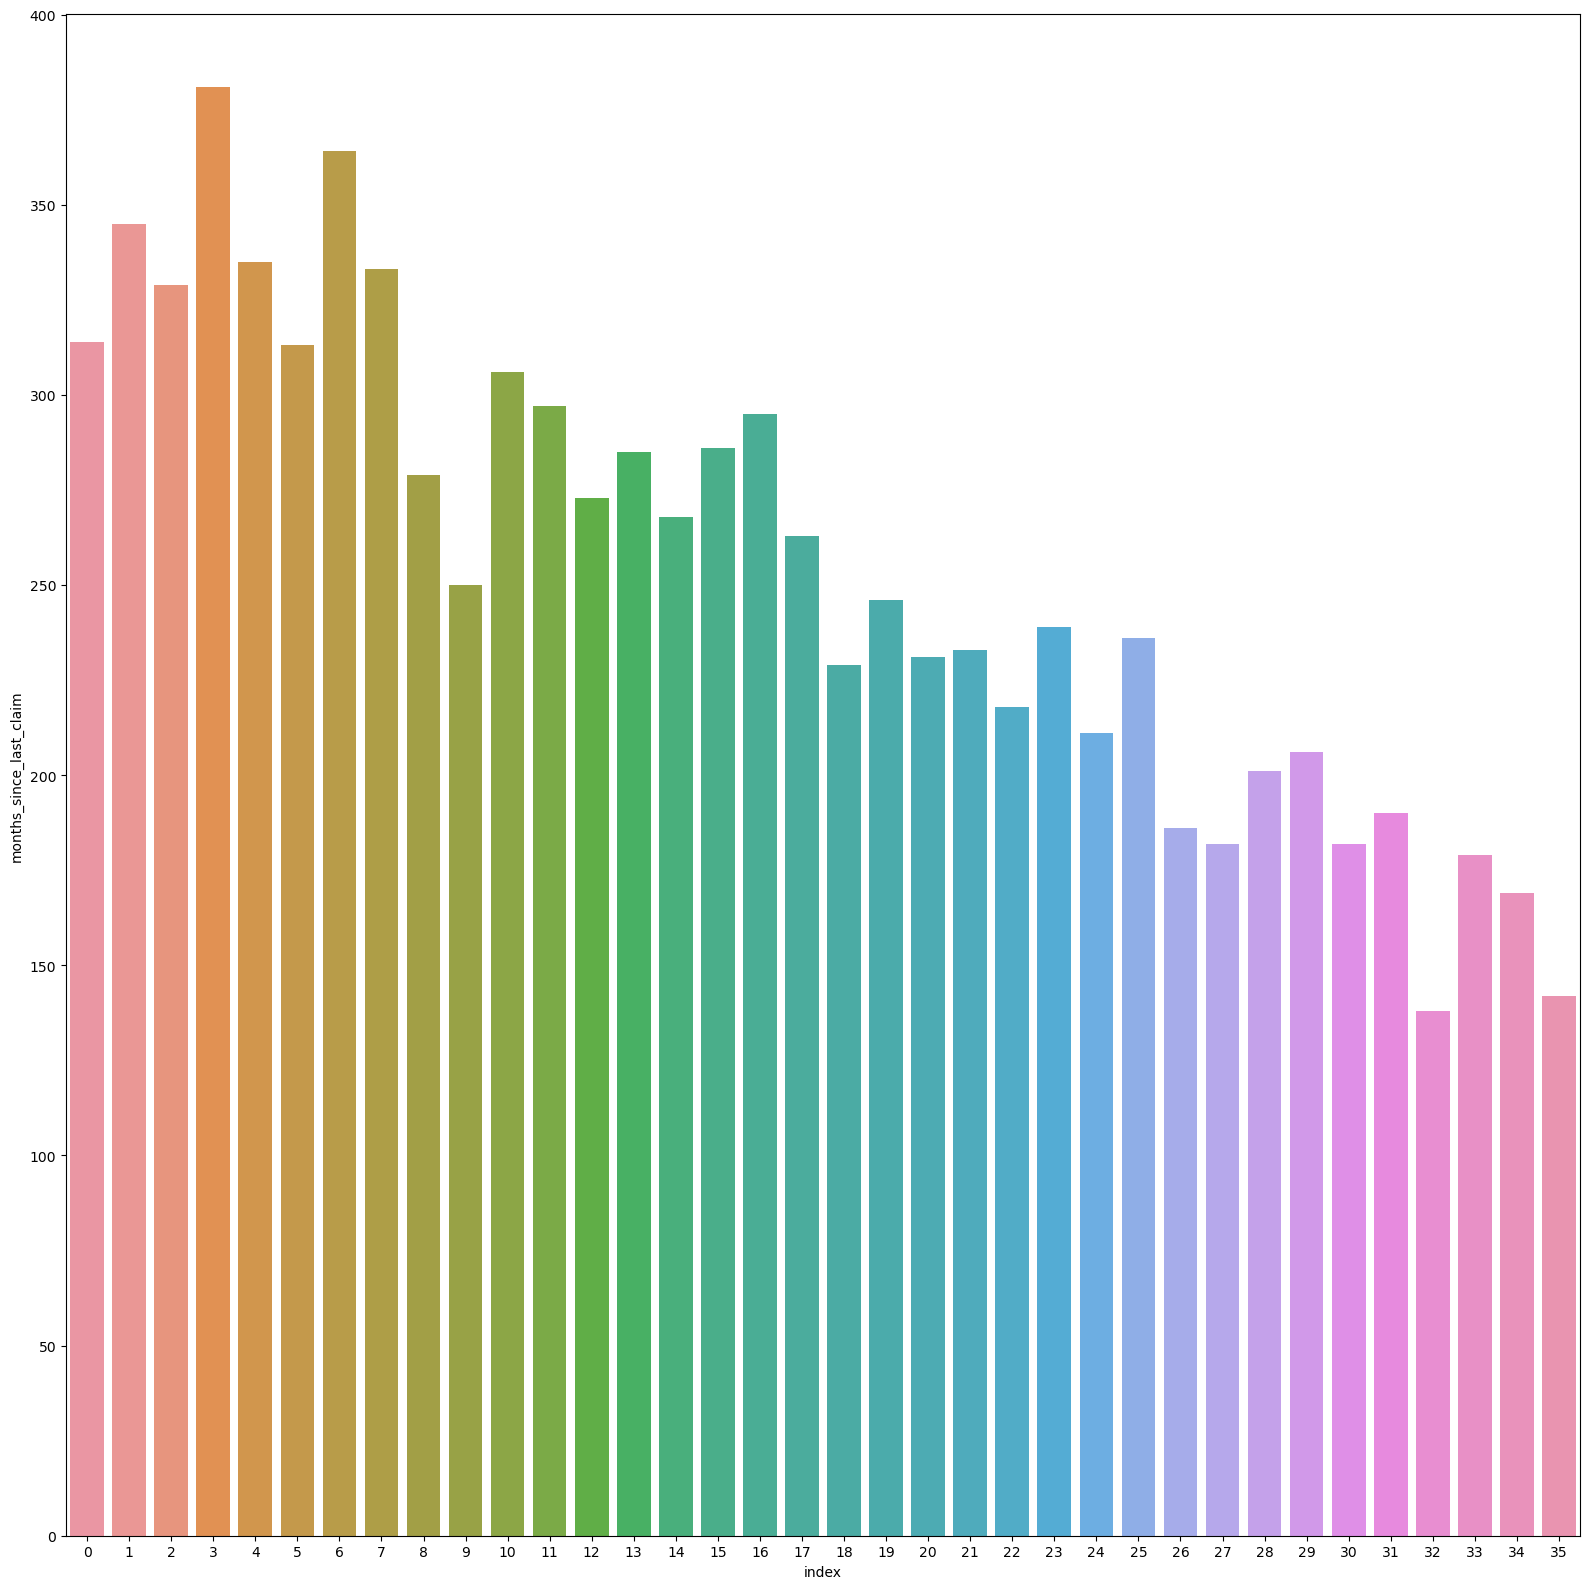

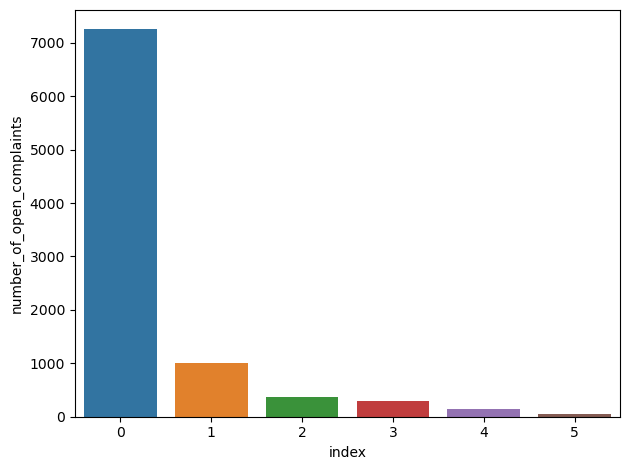

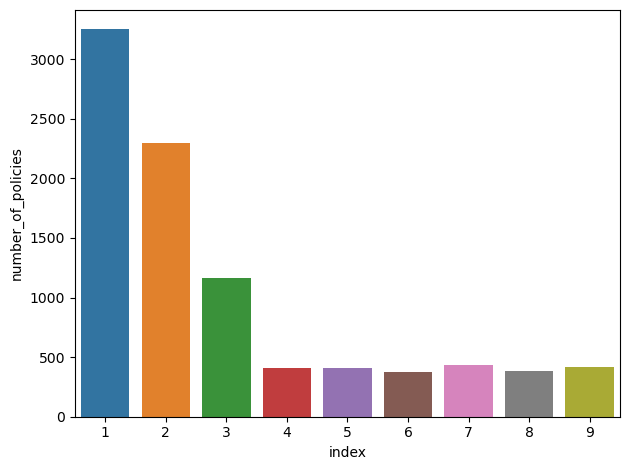

In [24]:
discrete_plots(discrete_df)
#Wanted to change axes titles but couldnt get it to work...

In [25]:
# Create a function to create a histogram for all the columns of the continuous_df. 

In [26]:
def continuous_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for col in df:
        sns.histplot(df[col])
        plt.show()

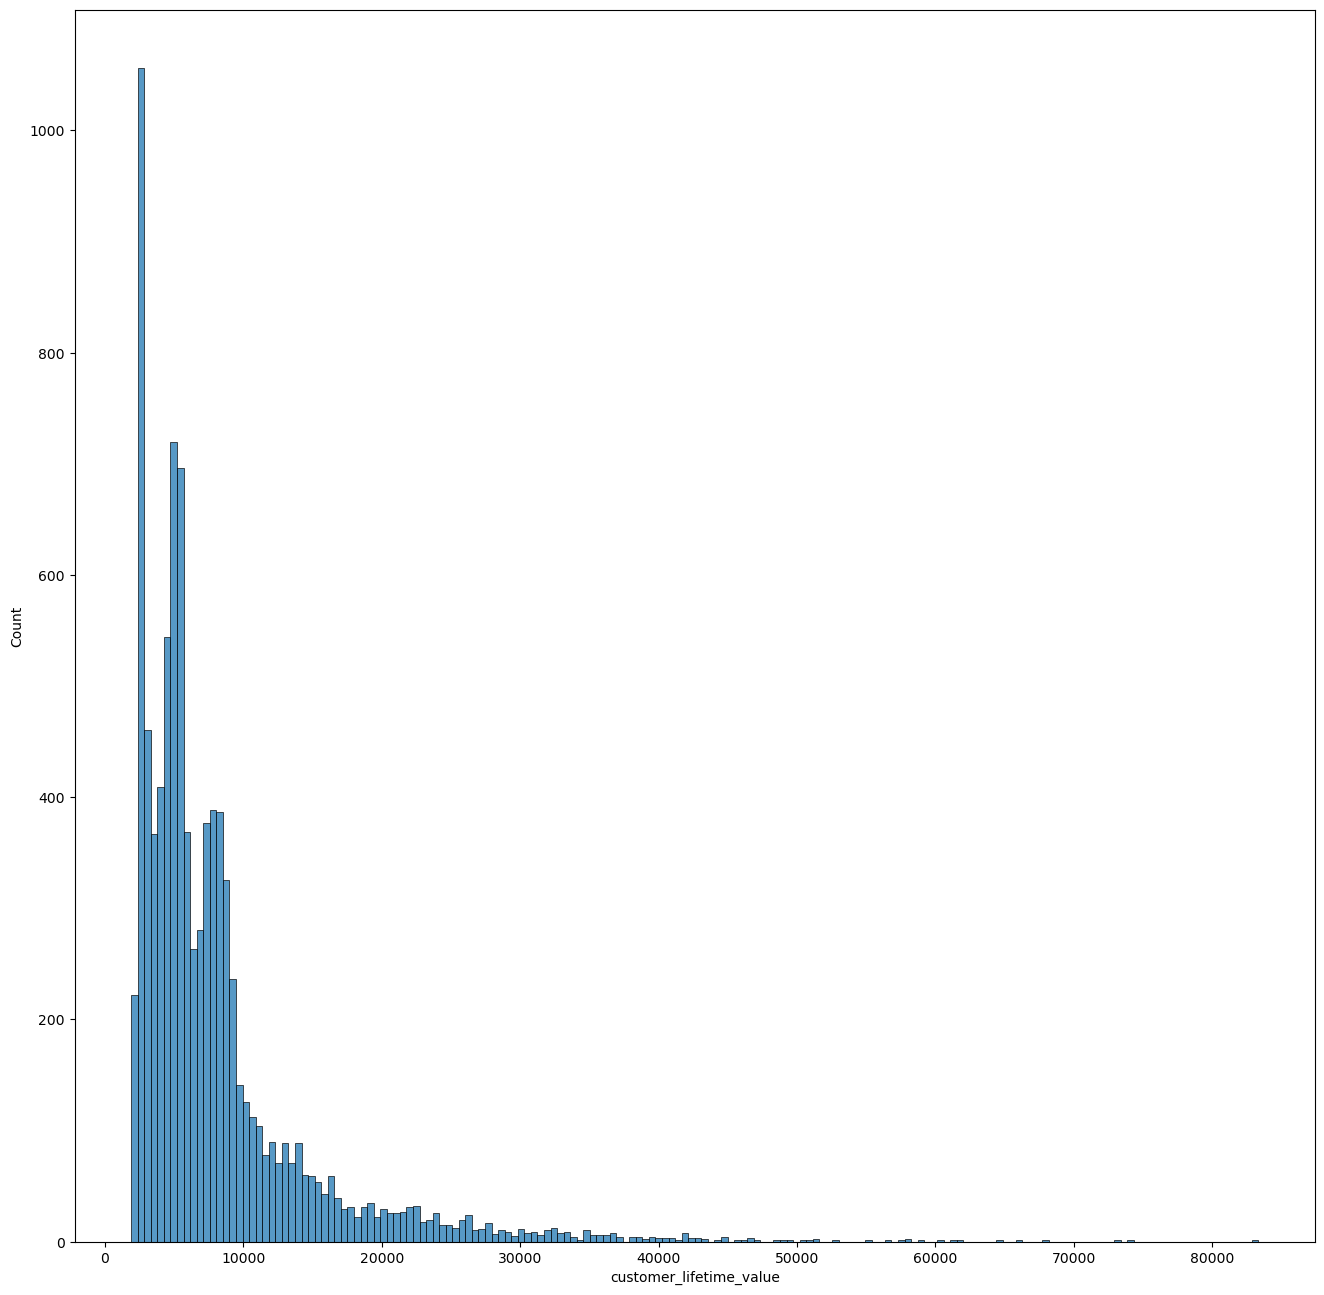

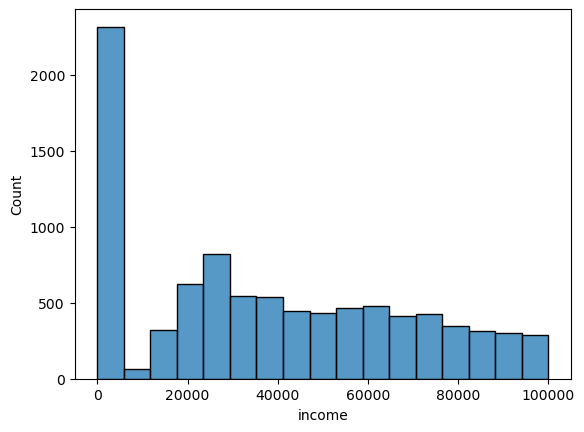

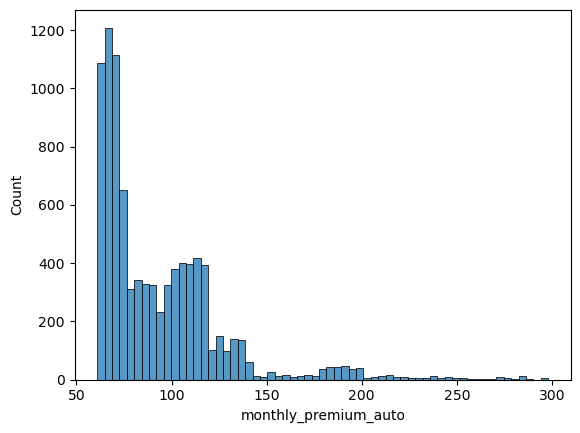

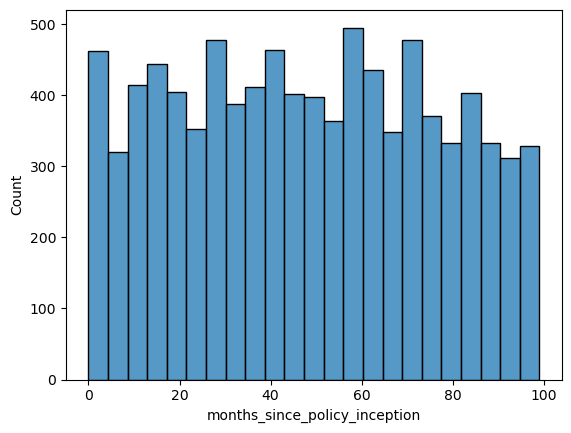

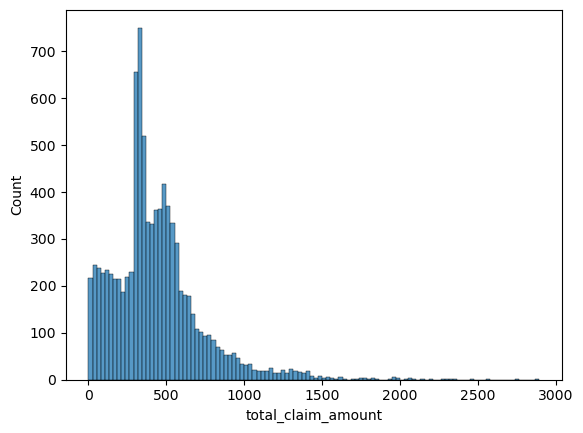

In [27]:
continuous_plots(continuous_df)

In [28]:
#According to previous plots there are some skewed distribtions and also the will need to be put in the same scale. 

In [29]:
#Look for outliers in the continuous variables. Define a function to do this.

In [30]:
def box_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for col in df:
        sns.boxplot(data= df, x=df[col])
        plt.show()

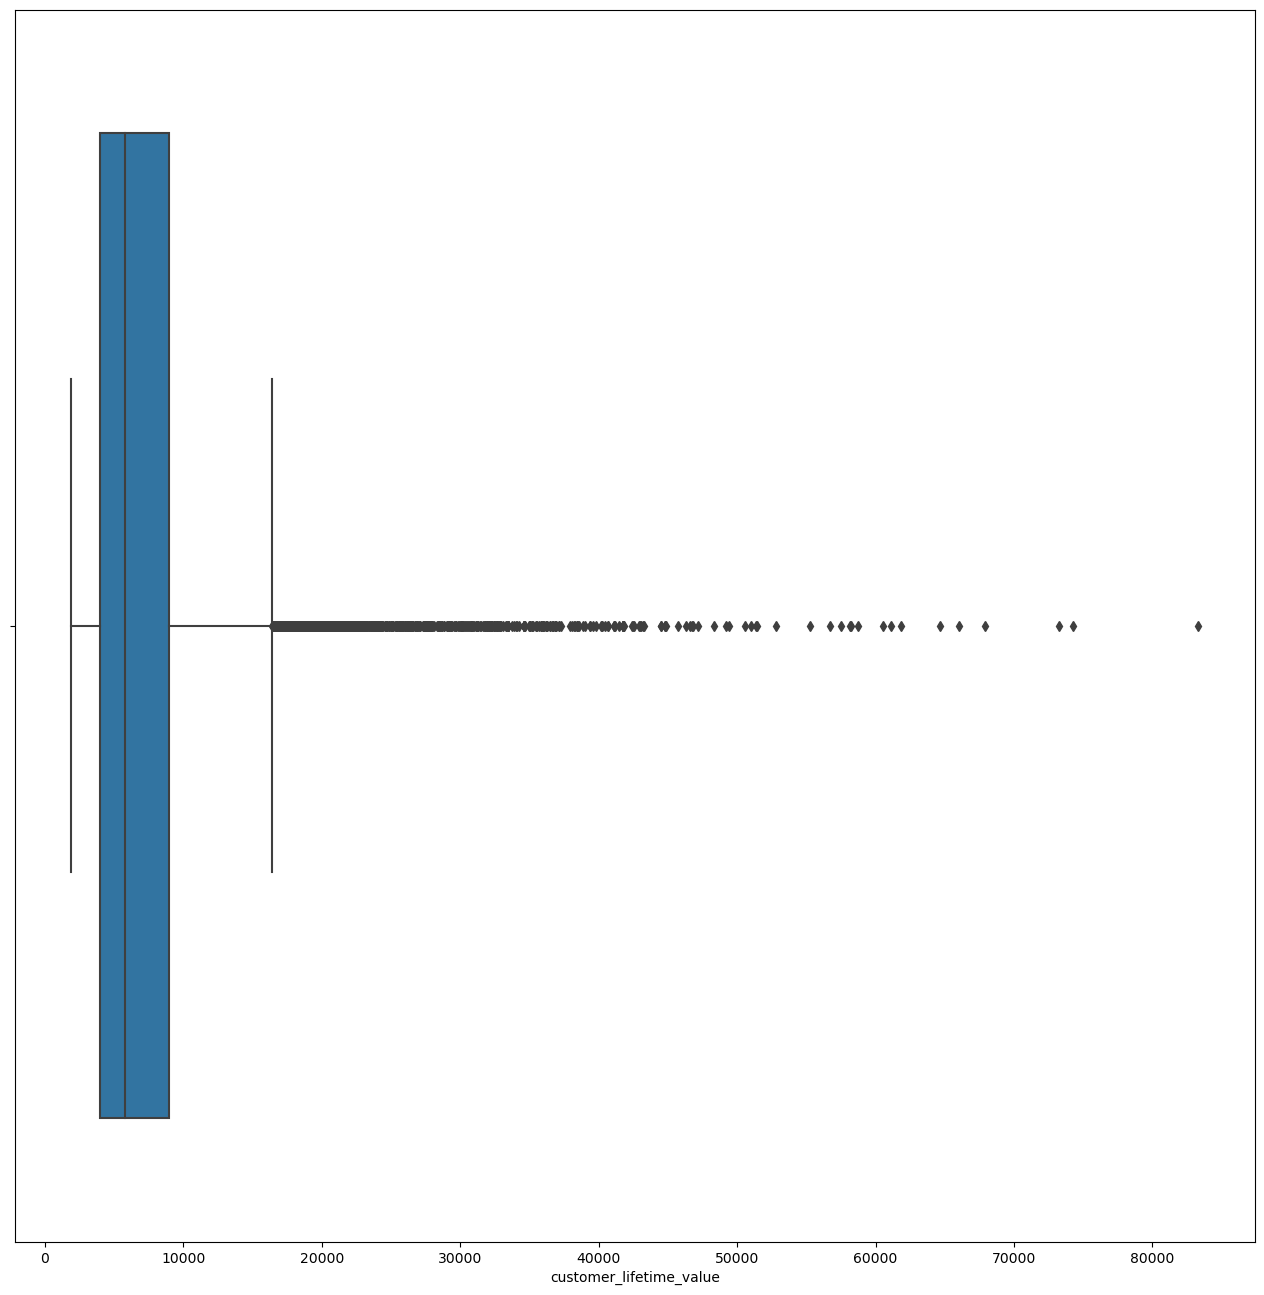

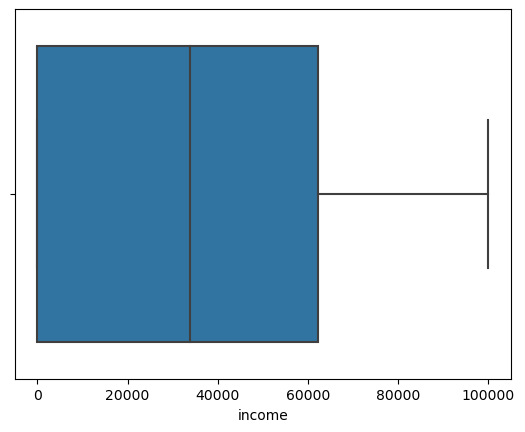

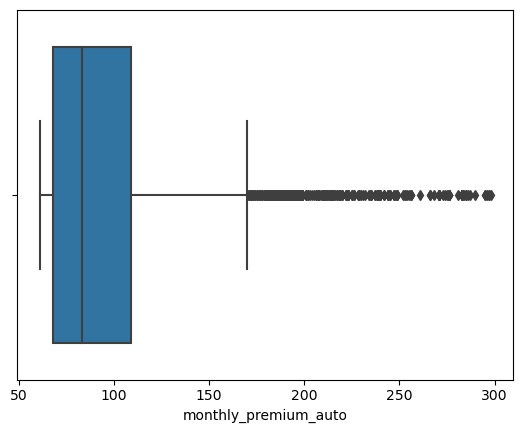

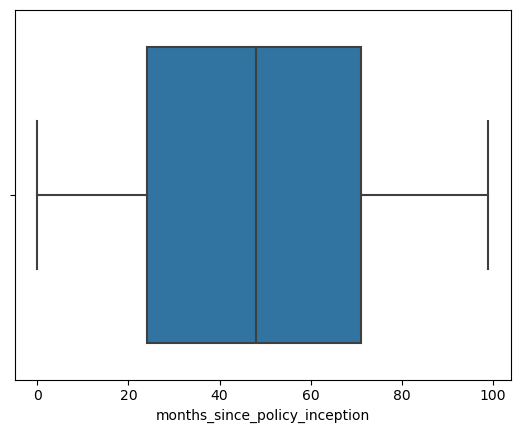

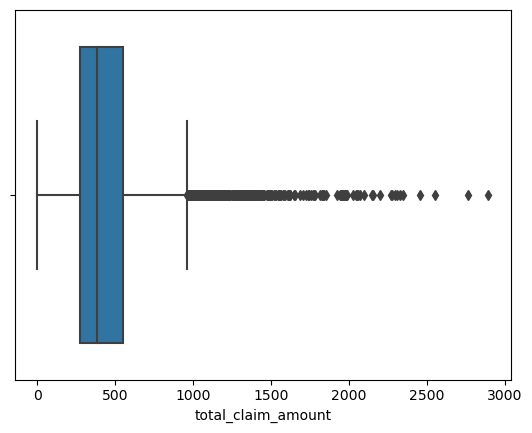

In [31]:
box_plots(continuous_df)

<h2> Lab Cleaning Categorical Data <h2>

In [32]:
# Define a function to create count plots of each categorical column

In [33]:
def count_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for col in df:
        if len(df[col].value_counts())<6:
            sns.countplot(data=df, x=df[col], order = df[col].value_counts().index)
        else:
            sns.countplot(data=df, y=df[col], order = df[col].value_counts().index)
        plt.tight_layout()
        plt.show() 

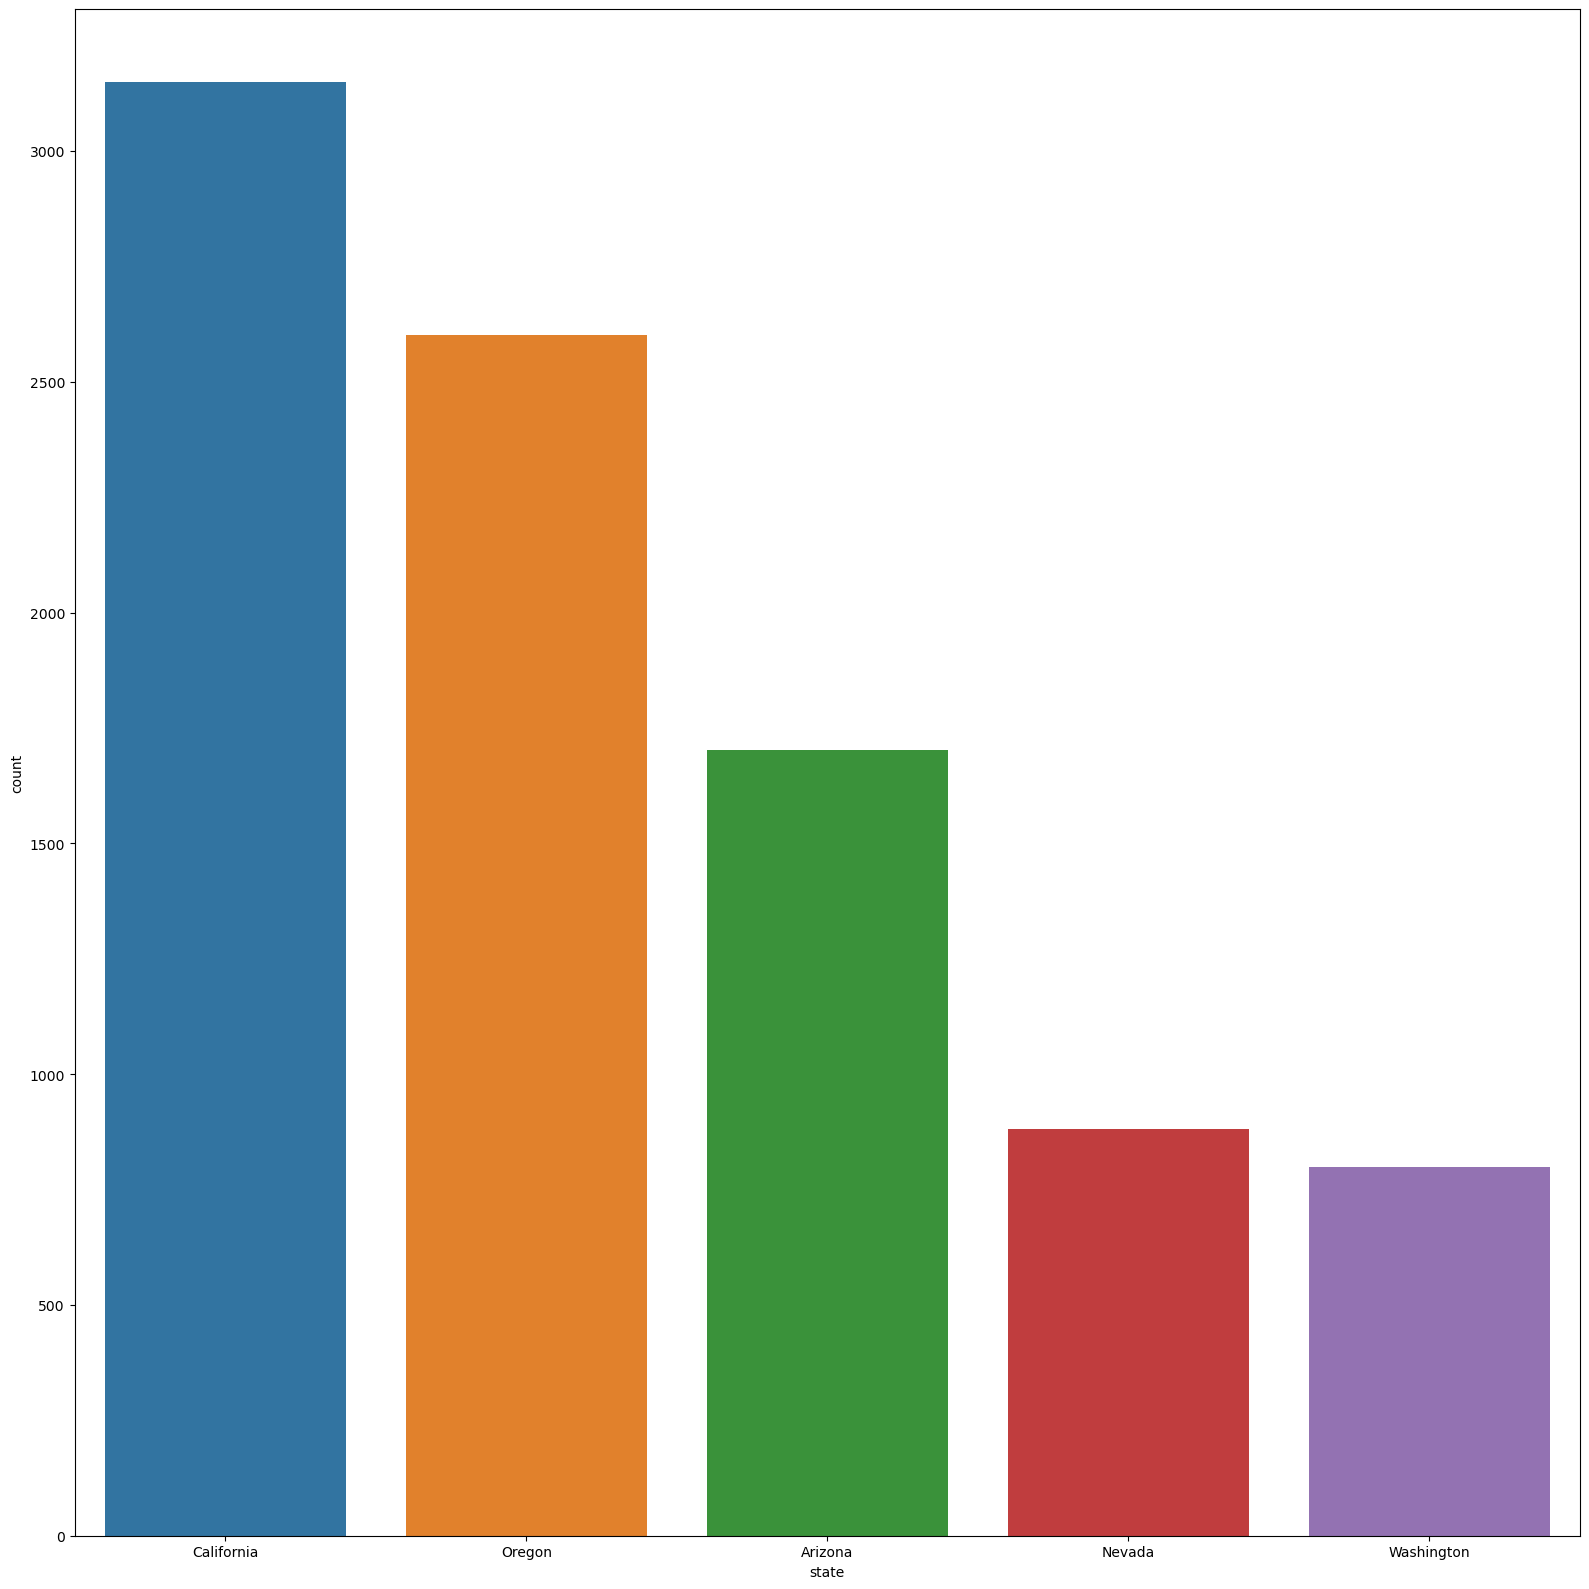

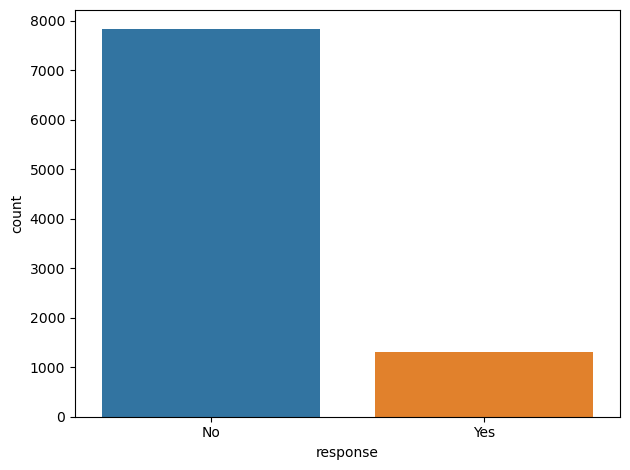

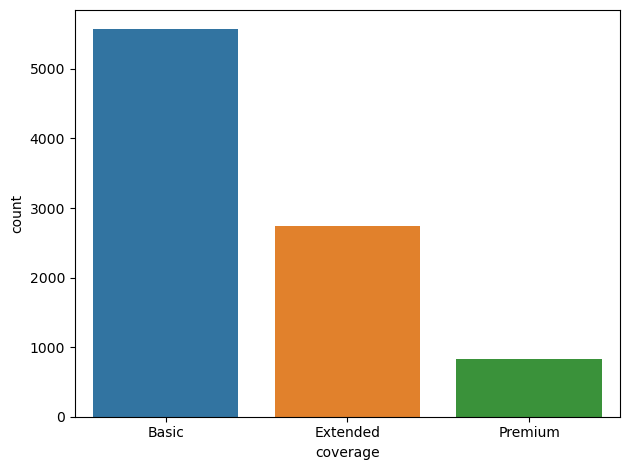

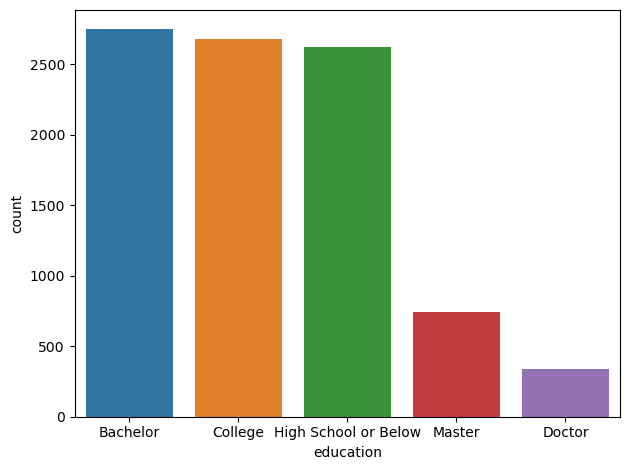

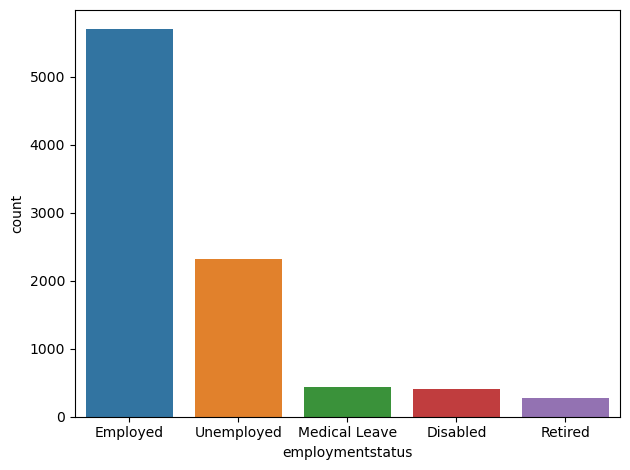

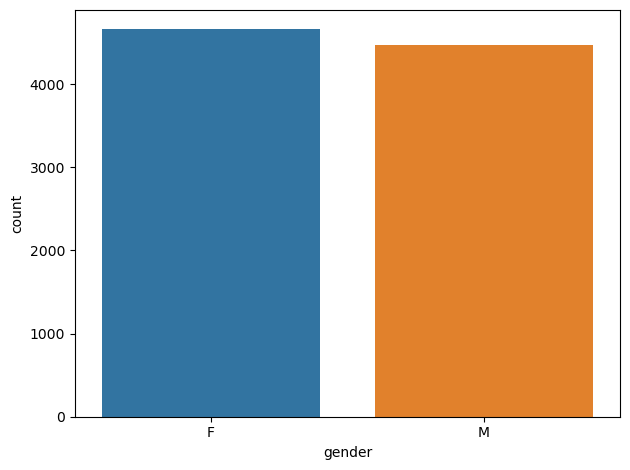

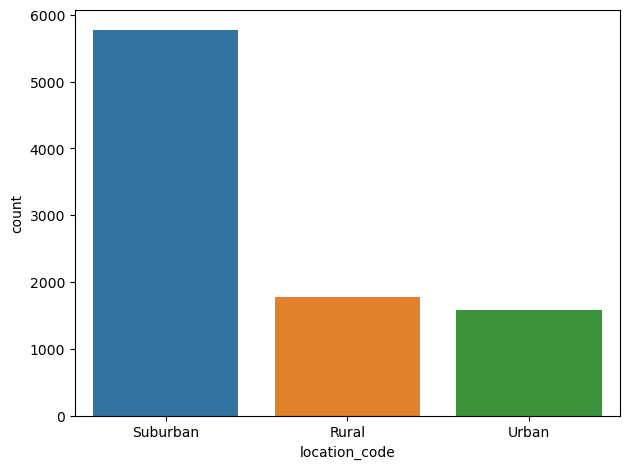

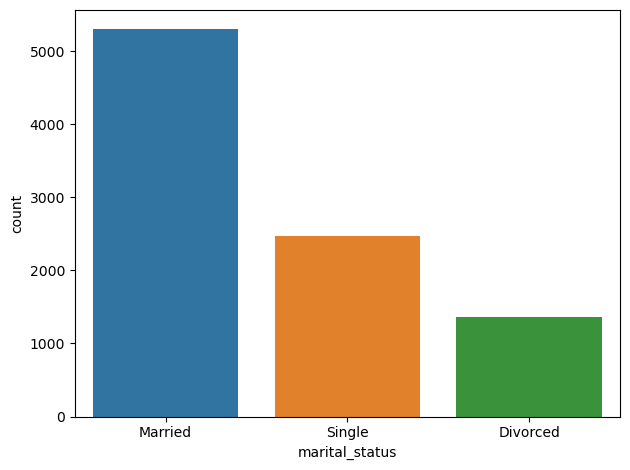

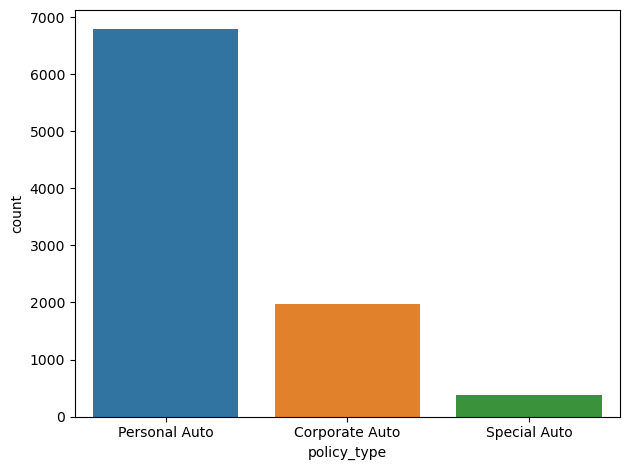

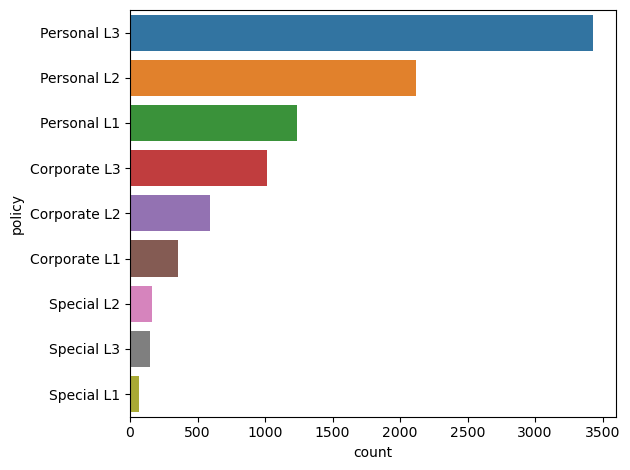

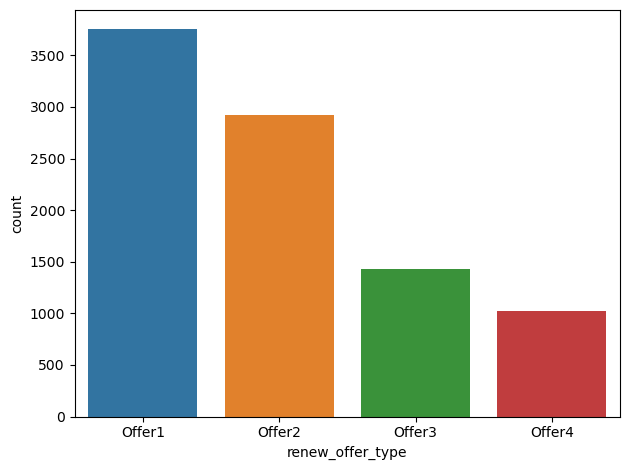

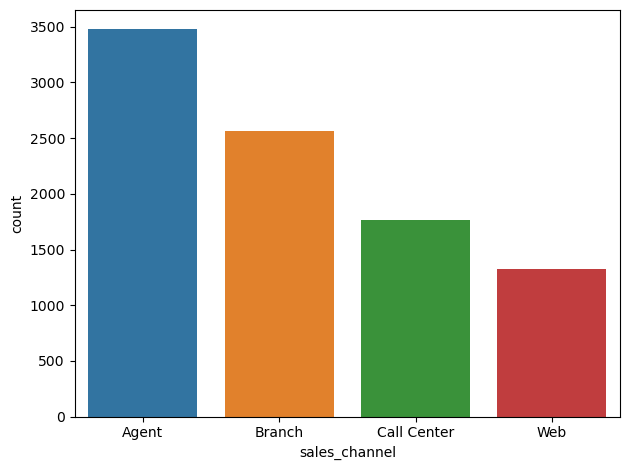

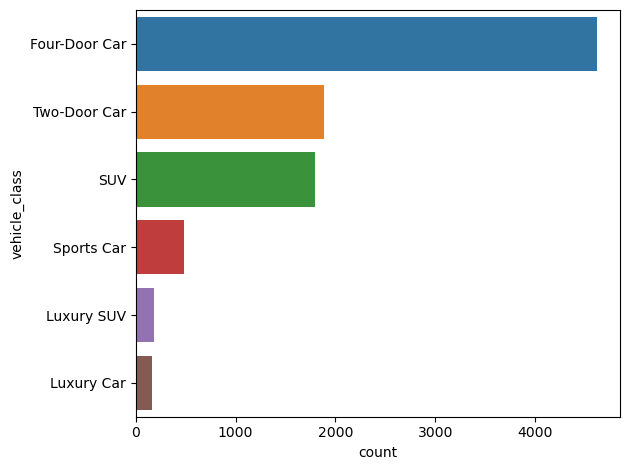

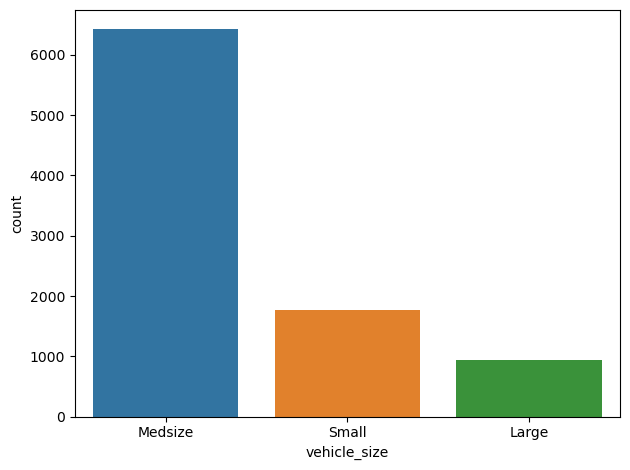

In [34]:
count_plots(categoricals)

In [35]:
# Drop the column policy_type
# Transform the column policy to three possible values: L1, L2, and L3 using a function.

In [36]:
categoricals = categoricals.drop(columns=['policy_type'])

In [37]:
def policy_clean(x):
    if x in ['Corporate L1', 'Personal L1', 'Special L1']:
        return 'L1'
    elif x in ['Corporate L2', 'Personal L2', 'Special L2']:
        return 'L2'
    elif x in ['Corporate L3', 'Personal L3', 'Special L3']:
        return 'L3'

In [38]:
categoricals['policy']

0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: policy, Length: 9134, dtype: object

In [39]:
categoricals['policy']=categoricals['policy'].apply(policy_clean)
categoricals['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

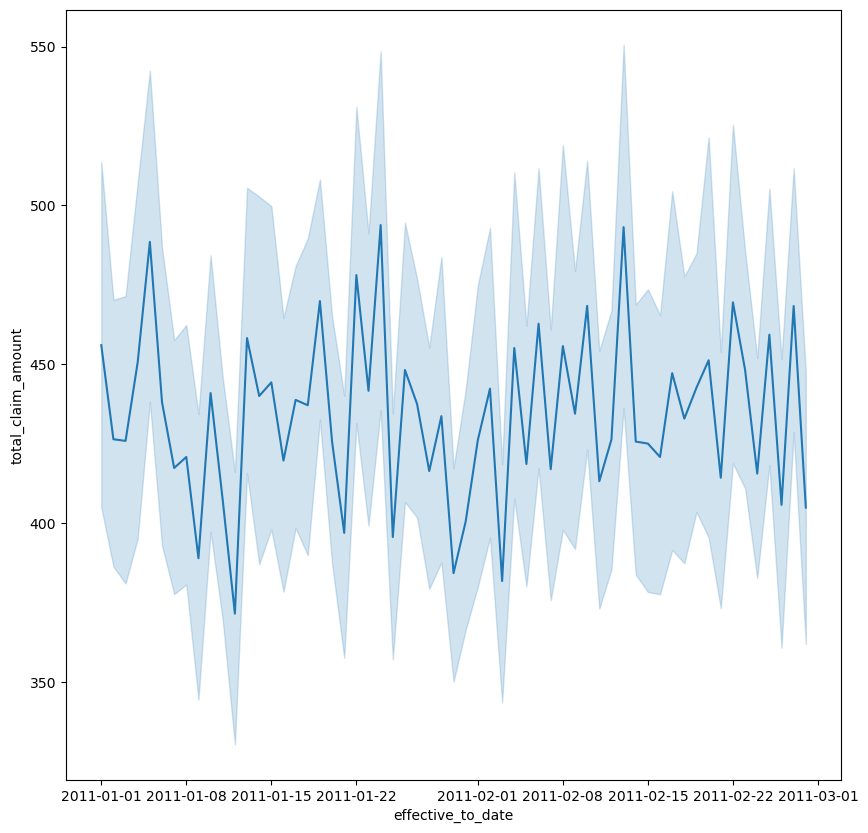

In [40]:
#Use the column effective_to_date to see if total_claim_amount is bigger at some specific dates. 
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = customer_df, x = customer_df['effective_to_date'], y=customer_df['total_claim_amount'])
plt.show()
#.countplot(data=df, x=df[col], order = df[col].value_counts().index)

In [41]:
#Define an empty DataFrame to analyse dates
customer_dates= pd.DataFrame()

In [42]:
def dates(df1):
    df = pd.DataFrame()
    df['day']=df1['effective_to_date'].dt.day
    df['day_name']=df1['effective_to_date'].dt.day_name()
    df['week']=df1['effective_to_date'].dt.isocalendar().week
    df['month']=df1['effective_to_date'].dt.month
    return df
    

In [43]:
customer_dates = dates(customer_df)
customer_dates['total_claim_amount']=customer_df['total_claim_amount']
customer_dates

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,2,384.811147
1,31,Monday,5,1,1131.464935
2,19,Saturday,7,2,566.472247
3,20,Thursday,3,1,529.881344
4,3,Thursday,5,2,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,2,198.234764
9130,12,Saturday,6,2,379.200000
9131,6,Sunday,5,2,790.784983
9132,3,Thursday,5,2,691.200000


In [44]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [45]:
dow = customer_dates.groupby(['day_name']).agg({'total_claim_amount':np.sum}).round(2).reindex(index=list_of_correct_days)
dow.reset_index()

,day_name,total_claim_amount
0,Monday,655689.71
1,Tuesday,502518.93
2,Wednesday,541563.05
3,Thursday,541820.80
4,Friday,533658.79
5,Saturday,608060.10
6,Sunday,581655.66


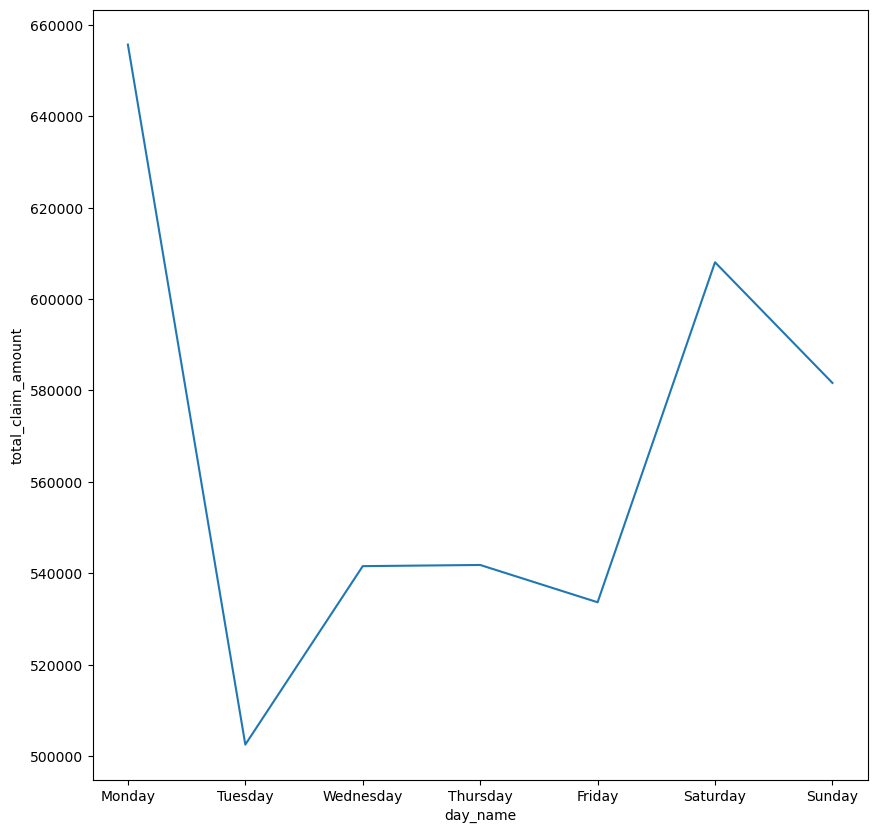

In [46]:
#Plot the previous series to see day of week
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = dow, x = 'day_name', y='total_claim_amount')
plt.show()
#Total claim amount significantly higher than other days of week. 

In [47]:
#Get the total number of claims by day of the week name and then reorder the index 
claims_count = customer_dates.groupby(['day_name']).agg({'total_claim_amount':'count'}).reindex(index=list_of_correct_days)
claims_count

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


In [48]:
#Get the median "target" by day of the week name 
claims_median = customer_dates.groupby(['day_name']).agg({'total_claim_amount':'median'})
claims_median=claims_median.sort_values('total_claim_amount', ascending=False).reset_index()
claims_median

,day_name,total_claim_amount
0,Thursday,395.328407
1,Wednesday,392.235698
2,Monday,385.735705
3,Sunday,383.721164
4,Saturday,379.200000
5,Tuesday,378.490829
6,Friday,371.803029


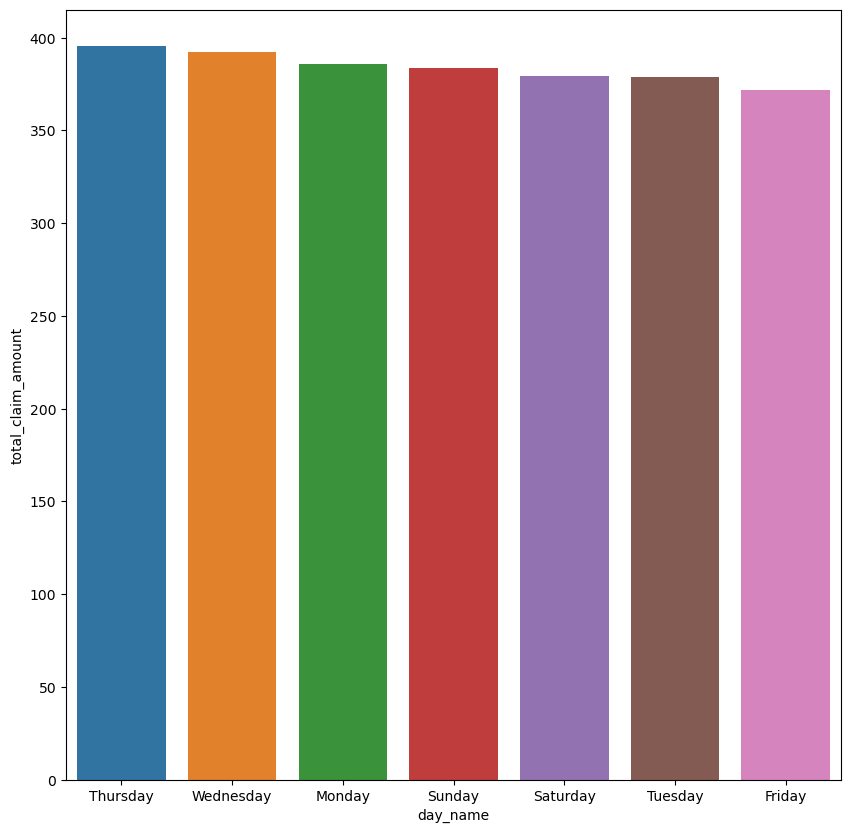

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data = claims_median, x = claims_median['day_name'], y=claims_median['total_claim_amount'])
plt.show()

From this analysis I can conclude that total claim amount doesn't vary significantly on certain days of week, although total claims amount is higher on Monday's due to a higher number of claims. 

In [50]:
# Compute total target column aggregated with month rounded to two d.p
customer_dates.groupby(['day_name']).agg({'total_claim_amount':'count'}).reindex(index=list_of_correct_days)

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


In [51]:
list_of_correct_months = (range(1,3)) #Only Jan and Feb

In [52]:
customer_dates.groupby(['month']).agg({'total_claim_amount':np.sum}).round(2).reindex(index=list_of_correct_months)

,total_claim_amount
month,
1,2117142.86
2,1847824.19


In [53]:
#As we only have data from January and February it would be hard to conduct a monthly analysis. 

In [54]:
categoricals['vehicle_class'].value_counts()


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [55]:
#Remove the outliers of a numerical continouous column depending if a value is bigger or smaller than a given amount 
#of standard deviations of the mean (thr=3)

In [56]:
def remove_outliers(df):
    df2=df.copy()
    thr = 3
    col=list(df2.columns)
    for col in df2[col]:
        df2 = df2[(np.abs(df2[col]-df2[col].mean()) <= (thr*df2[col].std()))]
    return df2

In [57]:
continuous_cleaned_df = remove_outliers(continuous_df)
continuous_cleaned_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...
9129,23405.987980,71941.0,73.0,89.0,198.234764
9130,3096.511217,21604.0,79.0,28.0,379.200000
9131,8163.890428,0.0,85.0,37.0,790.784983
9132,7524.442436,21941.0,96.0,3.0,691.200000


In [58]:
clean_df = pd.concat([continuous_cleaned_df,discrete_df,categoricals,customer_dates['day_name']], axis=1).dropna().reset_index()



In [59]:
#Re-order to get total_claim_amount as the last column

In [60]:
list(clean_df.columns)

['index',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount',
 'months_since_last_claim',
 'number_of_open_complaints',
 'number_of_policies',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'day_name']

In [61]:
clean_df = clean_df[['index',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'months_since_last_claim',
 'number_of_open_complaints',
 'number_of_policies',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'day_name','total_claim_amount',]]

In [62]:
#Turn response column values to yes/no

In [63]:
clean_df['response'] = clean_df['response'].replace('Yes', 1)
clean_df['response'] = clean_df['response'].replace('No', 0)
clean_df['response'].value_counts()

0    7339
1    1236
Name: response, dtype: int64

In [64]:
#Reduce class imbalance of the education status

In [65]:
def clean_education(x):
    x=x.lower()
    if x in ['master', 'doctor']:
        return 'graduate'
    else:
        return x
    

In [66]:
clean_df['education'] = list(map(clean_education, clean_df['education']))
clean_df['education'].value_counts()

bachelor                2585
college                 2531
high school or below    2441
graduate                1018
Name: education, dtype: int64

In [67]:
#Reduce class imbalance of the employment status

In [68]:
def clean_employment(x):
    x=x.lower()
    if x in ['medical leave', 'disabled', 'retired']:
        return 'inactive'
    else:
        return x

In [69]:
clean_df['employmentstatus'] = clean_df['employmentstatus'].apply(clean_employment)
clean_df['employmentstatus'].value_counts()

employed      5384
unemployed    2127
inactive      1064
Name: employmentstatus, dtype: int64

In [70]:
#Turn gender column into 1/0

In [71]:
clean_df['gender'] = clean_df['gender'].replace('F',1)
clean_df['gender'] = clean_df['gender'].replace('M',0)
clean_df['gender'].value_counts()

1    4383
0    4192
Name: gender, dtype: int64

In [72]:
#Reduce class imbalance for vehicle class

In [73]:
clean_df['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Sports Car        430
Luxury Car         41
Luxury SUV         31
Name: vehicle_class, dtype: int64

In [74]:
def clean_vehicle_class(x):
    x=x.lower()
    if x in ['sports car', 'luxury suv', 'luxury car']:
        return 'luxury'
    else:
        return x

In [75]:
clean_df['vehicle_class'] = clean_df['vehicle_class'].apply(clean_vehicle_class)
clean_df['vehicle_class'].value_counts()

four-door car    4577
two-door car     1869
suv              1627
luxury            502
Name: vehicle_class, dtype: int64

In [76]:
#Encode employment status
clean_df['employmentstatus'] = clean_df['employmentstatus'].replace('employed',3)
clean_df['employmentstatus'] = clean_df['employmentstatus'].replace('inactive',2)
clean_df['employmentstatus'] = clean_df['employmentstatus'].replace('unemployed',1)
clean_df['employmentstatus'].value_counts()

3    5384
1    2127
2    1064
Name: employmentstatus, dtype: int64

In [77]:
#Encode location code
clean_df['location_code'] = clean_df['location_code'].replace('Urban',3)
clean_df['location_code'] = clean_df['location_code'].replace('Suburban',2)
clean_df['location_code'] = clean_df['location_code'].replace('Rural',1)
clean_df['location_code'].value_counts()

2    5342
1    1710
3    1523
Name: location_code, dtype: int64

In [78]:
#Encode vehicle size 
clean_df['vehicle_size'] = clean_df['vehicle_size'].replace('Large',3)
clean_df['vehicle_size'] = clean_df['vehicle_size'].replace('Medsize',2)
clean_df['vehicle_size'] = clean_df['vehicle_size'].replace('Small',1)
clean_df['vehicle_size'].value_counts()

2    6033
1    1644
3     898
Name: vehicle_size, dtype: int64

In [85]:
#Get a dataframe with the categorical nominal columns 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8575 entries, 0 to 8574
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          8575 non-null   int64  
 1   customer_lifetime_value        8575 non-null   float64
 2   income                         8575 non-null   float64
 3   monthly_premium_auto           8575 non-null   float64
 4   months_since_policy_inception  8575 non-null   float64
 5   months_since_last_claim        8575 non-null   int64  
 6   number_of_open_complaints      8575 non-null   int64  
 7   number_of_policies             8575 non-null   int64  
 8   state                          8575 non-null   object 
 9   response                       8575 non-null   int64  
 10  coverage                       8575 non-null   object 
 11  education                      8575 non-null   object 
 12  employmentstatus               8575 non-null   i

In [89]:
categorical_nominal = clean_df[['state', 'coverage','education', 'marital_status','policy', 'renew_offer_type',
           'sales_channel','vehicle_class','day_name']]
categorical_nominal.head()

,state,coverage,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Basic,bachelor,Married,L3,Offer1,Agent,two-door car,Thursday
1,Arizona,Extended,bachelor,Single,L3,Offer3,Agent,four-door car,Monday
2,Nevada,Premium,bachelor,Married,L3,Offer1,Agent,two-door car,Saturday
3,California,Basic,bachelor,Married,L2,Offer1,Call Center,suv,Thursday
4,Washington,Basic,bachelor,Single,L1,Offer1,Agent,four-door car,Thursday


In [ ]:
#Create a list of named levels which that has as many elements as categorical nominal columns. 

In [98]:
nom_col=list(categorical_nominal.columns)
levels = []
for nom_col in categorical_nominal[nom_col]:
    levels.append(list(categorical_nominal[nom_col].unique()))
    
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Basic', 'Extended', 'Premium'],
 ['bachelor', 'college', 'graduate', 'high school or below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['two-door car', 'four-door car', 'suv', 'luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday']]

In [102]:
# Initiate a sklearn OneHotEncoder with drop set to first and categories to levels
from sklearn.preprocessing import OneHotEncoder

#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
encoder = OneHotEncoder(drop='first',categories=levels)
encoder.fit(categorical_nominal)

categorial_nominal_en_np = encoder.transform(categorical_nominal).toarray()
categorial_nominal_en = pd.DataFrame(categorial_nominal_en_np, columns=encoder.get_feature_names_out())
categorial_nominal_en

,state_Arizona,state_Nevada,state_California,state_Oregon,coverage_Extended,coverage_Premium,education_college,education_graduate,education_high school or below,marital_status_Single,...,sales_channel_Branch,vehicle_class_four-door car,vehicle_class_suv,vehicle_class_luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8571,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8572,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8573,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
